In [ ]:
!python -m spacy download en_core_web_lg # Install the Spacy language model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 902.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter


nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from google.colab import drive
drive.mount('/gdrive')

file = r'/gdrive/My Drive/AUD_Project_Data.csv'

df = pd.read_csv(file)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Mounted at /gdrive


,stars_x,useful,text,name,postal_code,review_count,categories,year,month,Day_Of_Week
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday


In [ ]:
# Concatenate month and year into single date column
df['date'] = df['month'].apply(lambda x: f"{x:02d}") + '-' + df['year'].astype(str)
df.head()

,stars_x,useful,text,name,postal_code,review_count,categories,year,month,Day_Of_Week,date
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday,09-2015
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday,08-2013
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday,10-2016
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday,09-2015
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday,02-2016


In [ ]:
# Preprocess Function
def preprocess_text(text):
    if isinstance(text, float):
        return ""

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters

    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply Lemmatization

    return " ".join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)
df.head()

,stars_x,useful,text,name,postal_code,review_count,categories,year,month,Day_Of_Week,date,processed_text
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday,09-2015,second stop center city restaurant week rl din...
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday,08-2013,moved chicago philadelphia year ago everybody ...
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday,10-2016,trying twice unsuccessfully get early enough g...
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday,09-2015,place game changer neighborhood got take tonig...
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday,02-2016,went dinner opening day happy great atmosphere...


In [ ]:
nlp = spacy.load("en_core_web_lg")

def entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Apply entity function to filtered reviews dataframe
df["entities"] = df["processed_text"].apply(entities)

# Aggregate all entities from dataframe into list
agg_ent = [ent for ent_list in df["entities"] for ent in ent_list]

# Count the entities and print top 20
ent_count = Counter(agg_ent)

top_20_ent = ent_count.most_common(20)

print(top_20_ent)

[('one', 9199), ('first', 4719), ('two', 4031), ('philadelphia', 1893), ('philly', 1722), ('three', 1470), ('italian', 1402), ('french', 1373), ('second', 1336), ('half', 1065), ('night', 1043), ('thai', 1016), ('sunday', 1005), ('hour', 979), ('saturday', 950), ('chinese', 917), ('four', 799), ('mexican', 789), ('today', 657), ('five', 637)]


<ipython-input-8-898eba5fcd33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(entities), palette="viridis")


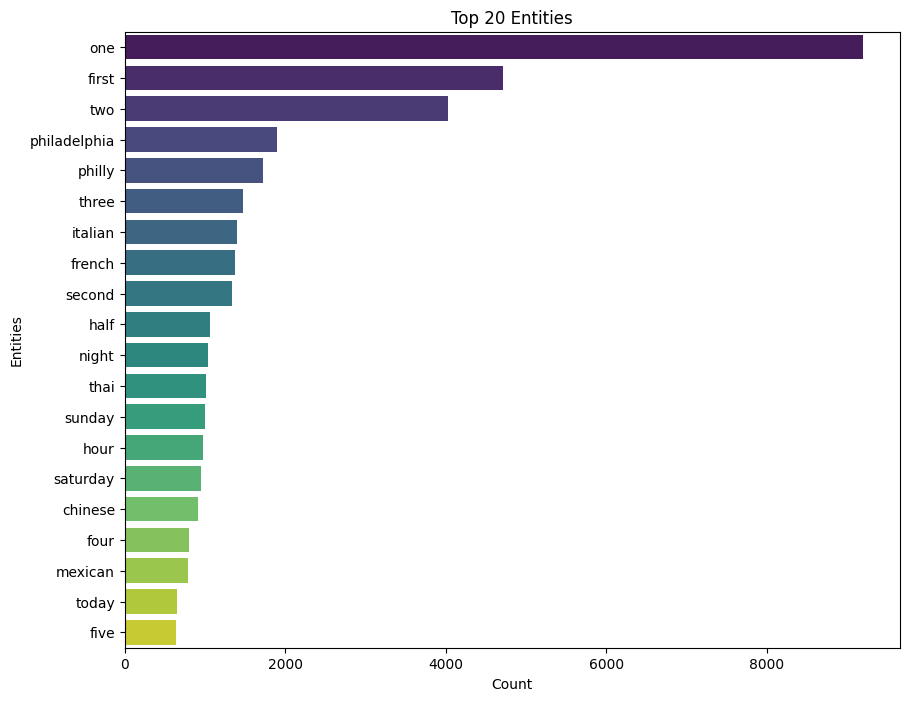

In [ ]:
entities, counts = zip(*top_20_ent)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(entities), palette="viridis")

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Entities')
plt.title('Top 20 Entities')

# Show the plot
plt.show()

In [ ]:
# Generic terms to further refine model
generic_terms = set(["one", "two", "three", "four", "five", "first", "second", "third", "fourth", "fifth", "night", "today", "hour", "philly", "philadelphia"])

In [ ]:
# Food-related keywords
food_keywords = {
    "Italian":["pasta", "pizza", "lasagna", "risotto"],
    "Mexican":["taco", "burrito", "quesadilla", "enchilada"],
    "Japanese":["sushi","ramen","noodles","broth","gyoza","tempura"],
    "American":["burger","fries","bbq","steak", "cheesesteak"],
    "Chinese":["dumpling", "noodle", "kung pao", "fried rice"],
    "Indian":["curry", "biryiani", "tikka masala", "naan", "tandoori"]
}

In [ ]:
# function to extract food-related words while removing generic terms
def extract_food_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words
    filtered_words = [word for word in words if word in set(sum(food_keywords.values(), [])) and word not in generic_terms]
    return filtered_words

# Apply keyword extraction
df["food_mentions"] = df["text"].dropna().apply(extract_food_keywords)
df.head()

,stars_x,useful,text,name,postal_code,review_count,categories,year,month,Day_Of_Week,date,processed_text,entities,food_mentions
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday,09-2015,second stop center city restaurant week rl din...,"[second, two, one, three]","[risotto, risotto]"
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday,08-2013,moved chicago philadelphia year ago everybody ...,"[chicago, philadelphia year ago, raf, five, fo...",[]
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday,10-2016,trying twice unsuccessfully get early enough g...,"[nazi, gu falafel nazi]",[pasta]
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday,09-2015,place game changer neighborhood got take tonig...,"[tonight, latin]",[]
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday,02-2016,went dinner opening day happy great atmosphere...,"[pho, summer, one, fairmount]",[]


In [ ]:
# Flatten and count food mentions
food_counter = Counter([item for sublist in df["food_mentions"] for item in sublist])
food_df = pd.DataFrame(food_counter.items(), columns=["Food Item", "Count"]).sort_values(by="Count", ascending=False)

In [ ]:
# Categorize food mentions by cuisine type
cuisine_counts = {cuisine: sum(food_counter.get(item, 0) for item in foods) for cuisine, foods in food_keywords.items()}
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=["Cuisine", "Count"]).sort_values(by="Count", ascending=False)

In [ ]:
# Display results
print("Top Food Dishes and Trends:")
print(food_df.head(20))

print("\nCuisine Trends:")
print(cuisine_df)

Top Food Dishes and Trends:
      Food Item  Count
9         pizza   3876
2         fries   2812
8         steak   2585
3        burger   2286
6       noodles   1794
7   cheesesteak   1792
15        sushi   1732
1         pasta   1230
13        broth   1122
10          bbq    967
12        curry    852
14       noodle    839
18        ramen    746
5          taco    615
4       burrito    591
19     dumpling    362
17      tempura    267
11         naan    210
0       risotto    203
16   quesadilla    125

Cuisine Trends:
    Cuisine  Count
3  American  10442
2  Japanese   5737
0   Italian   5390
1   Mexican   1377
4   Chinese   1201
5    Indian   1105
